## Flow study

### With shortest path

In [1]:
import networkx as nx
import numpy as np
import time
# Open adjencency list file and build the undirected graph
f=open("../lightningAdjList_26Out.txt", 'rb')
G=nx.read_multiline_adjlist(f)
f.close()

# Clean graph from smallest components
G = max(nx.connected_component_subgraphs(G), key=len)

print("Number of nodes: " + str(G.number_of_nodes()))
print("Number of edges: " + str(G.number_of_edges()))

# Read alias file and create a pub_key -> alias dic

Number of nodes: 1642
Number of edges: 8506


In [2]:
# Get the shortest path between all nodes
shortest_paths = dict(nx.all_pairs_shortest_path(G))

# The bottleneck of a path
minCap = 10**10

# Capacity of the edge we are iteration in
edgeCap = 0

# Total number of paths
totalPaths = 0
pathsWithCapacity = [0] * 100

# Iterate through all the shortest paths
for source, paths in shortest_paths.items():
    
    # Iterate through all the paths starting from one source
    for target, path in paths.items():
        
        # Reset threshold capacity
        minCap = 10**10
        
        # Make sure we only consider paths to other nodes
        if len(path) > 1:
        
            # Iterate through edges of path and get threshold capacity
            for nodeNumber in range(0, len(path) - 1):
            
                edgeCap = (G.get_edge_data(path[nodeNumber], path[nodeNumber + 1]))["capacity"]
                if edgeCap < minCap:
                    minCap = edgeCap
    
            # Save threshold against predefined capacities
            for i in range(0,100):
                if 10000*i < minCap:
                    pathsWithCapacity[i]+=1

In [1]:
import matplotlib.pyplot as plt

# Graph with Probability of payment success as a function of payments size (satoshis)
totalPaths = pathsWithCapacity[0]
paymentProbPath = [(i/totalPaths)*100 for i in pathsWithCapacity]
paymentSizePath = [10000*i for i in range(0,100)]

plt.plot(paymentSizePath, paymentProbPath, 'b')
plt.title("LN Shortest Path Payment Success")
plt.ylabel("Probability Of Payment Success")
plt.xlabel("Payment Volume (Sats)")

plt.show()

# Graph with Probability of payment success as a function of payments size (€)
totalPaths = pathsWithCapacity[0]
paymentProbPath = [(i/totalPaths)*100 for i in pathsWithCapacity]
paymentSizePath = [(10000*i)*0.00003920 for i in range(0,100)]

plt.plot(paymentSizePath, paymentProbPath, 'b')
plt.title("LN Shortest Path Payment Success Probability")
plt.ylabel("Probability Of Payment Success")
plt.xlabel("Payment Volume (€)")

plt.show()

NameError: name 'pathsWithCapacity' is not defined

### With maximum flow 

In [4]:
import random

# Get the flow value between some random pairs of nodes and store it
nodes =  list(G.nodes())
maxFlows = []
numNodes = len(nodes)

for i in range (0, 100):
    
    #Get a random source and sink
    randomResult = random.sample(range(0, numNodes - 1), 2)
    source = nodes[randomResult[0]]
    sink = nodes[randomResult[1]]
    
    # Make sure they are different
    if(source != sink):
        flow_value = nx.maximum_flow_value(G, source, sink)
        maxFlows.append(flow_value)
        
    if i % 100 == 0:
        print(i)
        
# Sort flow values from smallest to largest
maxFlows.sort(reverse=True)

0


In [5]:
flowsWithCapacity = [0] * 100

# Get a cumulative flowsWithCapacity list so we can plot the graph
for i in range(0,100):
    for maxFlow in maxFlows:
        if 10000*i < maxFlow:
            flowsWithCapacity[i]+=1
        else:
            break

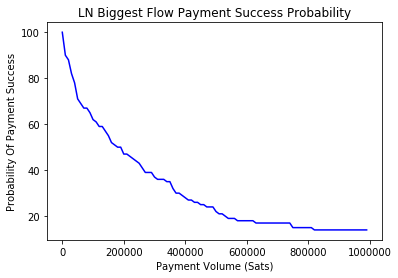

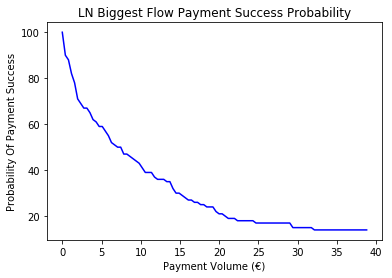

In [6]:
import matplotlib.pyplot as plt

# Graph with Probability of payment success as a function of payments size (satoshis)
totalFlows = flowsWithCapacity[0]
paymentProbFlow = [(i/totalFlows)*100 for i in flowsWithCapacity]
paymentSizeFlow = [10000*i for i in range(0,100)]

plt.plot(paymentSizeFlow, paymentProbFlow, 'b')
plt.title("LN Biggest Flow Payment Success Probability")
plt.ylabel("Probability Of Payment Success")
plt.xlabel("Payment Volume (Sats)")

plt.show()

# Graph with Probability of payment success as a function of payments size (€)
totalFlows = flowsWithCapacity[0]
paymentProbFlow = [(i/totalFlows)*100 for i in flowsWithCapacity]
paymentSizeFlow = [(10000*i)*0.00003920 for i in range(0,100)]

plt.plot(paymentSizeFlow, paymentProbFlow, 'b')
plt.title("LN Biggest Flow Payment Success Probability")
plt.ylabel("Probability Of Payment Success")
plt.xlabel("Payment Volume (€)")

plt.show()

## Comparison

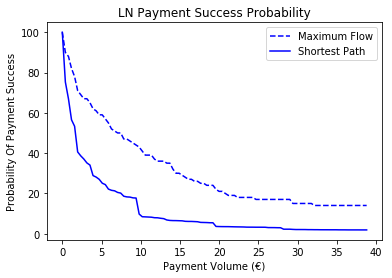

In [7]:
#Compare the two graphs

plt.title("LN Payment Success Probability")
plt.ylabel("Probability Of Payment Success")
plt.xlabel("Payment Volume (€)")

plt.plot(paymentSizeFlow, paymentProbFlow, 'b', linestyle='--', label="Maximum Flow")
plt.plot(paymentSizePath, paymentProbPath, 'b', label="Shortest Path")
plt.legend()
plt.show()

In [8]:
used_capacity = sum(paymentProbPath)/sum(paymentProbFlow)

print(paymentProbPath)

print("Used capacity = " + str(used_capacity*100) + "%")

[100.0, 75.27914041896857, 67.00398066892755, 56.53050893627886, 53.32608158330123, 40.573318755608604, 38.63817033225188, 37.06590630917098, 35.124597238397016, 34.045036559360064, 28.839400828792638, 28.10461373111817, 26.989573660931327, 25.05954673964436, 24.352519667681317, 22.13431547413604, 21.5247453908337, 21.28184516585873, 20.474058107523337, 20.143350100685762, 18.591052513210133, 18.25537145363816, 18.16351842738712, 17.780482029836833, 17.69271136030806, 9.737422815623699, 8.412698059247614, 8.341108367272563, 8.263098241543398, 8.17870479439396, 7.924299745928963, 7.881843236017372, 7.643582052772254, 7.458168832913594, 6.799758918279383, 6.571889188509131, 6.499186126518914, 6.483116485966713, 6.430750982920162, 6.376344301512477, 6.134557446552672, 6.080484776149536, 6.0730994217156145, 6.004701390450699, 5.927396399064473, 5.598321334915803, 5.5594276090527375, 5.51622885246437, 5.427790160926501, 5.417992504793058, 3.595368677635588, 3.5372136505101834, 3.50585372841